K-means 

metrica de distancias 

Distancia Minkowski para (p=1): 7.0000
Distancia Minkowski para (p=2): 4.5826
Distancia Minkowski para (p=3): 4.1793
Distancia Minkowski para (p=4): 4.0648
Distancia Minkowski para (p=5): 4.0255
Distancia Minkowski para (p=6): 4.0105
Distancia Minkowski para (p=7): 4.0045
Distancia Minkowski para (p=8): 4.0020
Distancia Minkowski para (p=9): 4.0009
Distancia Minkowski para (p=10): 4.0004


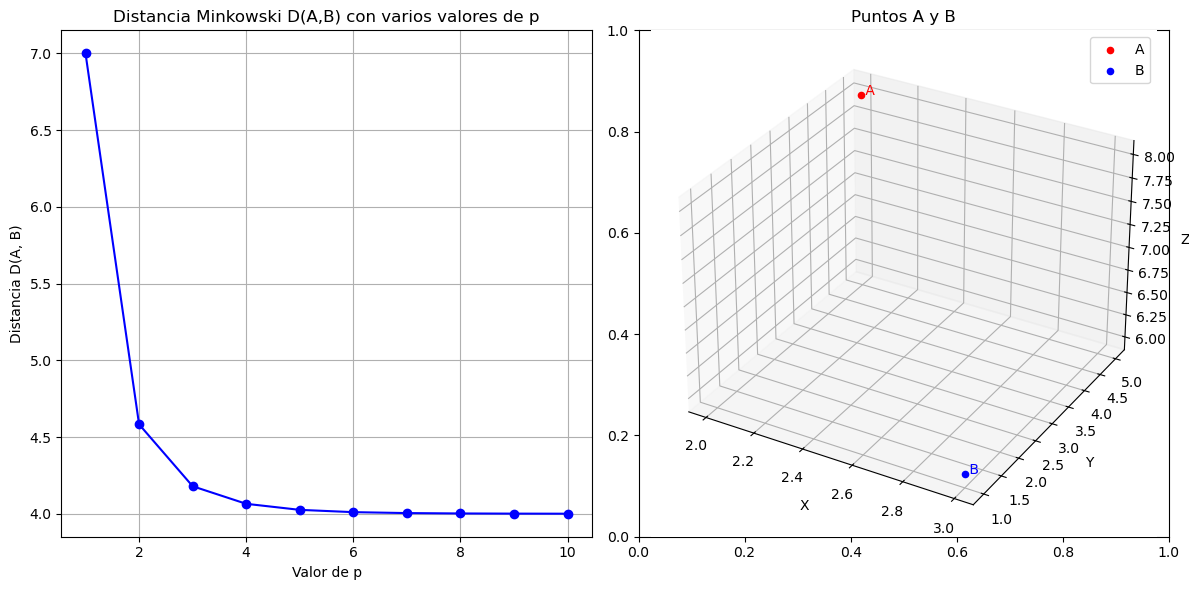

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#https://www.geeksforgeeks.org/maths/minskowski-distance/

# Calculamos la distancia entre dos puntos A y B en función del valor p
# p = 1: Distancia Manhatan (L1)
# P = 2: Distancia Euclidiana (L2)
# P => 3: Norma superior
def minkowski_dist(A, B, p):
    return np.power(np.sum(np.abs(np.array(A) - np.array(B)) ** p), 1 / p)

## Puntos
A = np.array([2, 5, 8])
B = np.array([3, 1, 6])

# Calculamos distancias con varias "p"
p_values = list(range(1, 11))
distances = [minkowski_dist(A, B, p) for p in p_values]

# Mostramos los resultados
for p, d in zip(p_values, distances):
    print(f"Distancia Minkowski para (p={p}): {d:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data
axes[0].plot(p_values, distances, marker='o', linestyle='-', color='b')
axes[0].set_title("Distancia Minkowski D(A,B) con varios valores de p")
axes[0].set_xlabel("Valor de p")
axes[0].set_ylabel("Distancia D(A, B)")
axes[0].grid(True)

# 3D scatter plot of points A and B
axes[1] = fig.add_subplot(1, 2, 2, projection='3d')
axes[1].scatter(A[0], A[1], A[2], color='red', label='A')
axes[1].scatter(B[0], B[1], B[2], color='blue', label='B')
axes[1].text(A[0], A[1], A[2], ' A', color='red')
axes[1].text(B[0], B[1], B[2], ' B', color='blue')
axes[1].set_title("Puntos A y B")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_zlabel("Z")
axes[1].legend()

plt.tight_layout()
plt.show()

K-Medias paso a paso

In [2]:
# Función para calcular la distancia Euclidiana
def distancia_euclidiana(punto1, punto2):
    #Calculates the Euclidean distance between two points.
    return np.sqrt(np.sum((punto1 - punto2)**2))



# Función que calcula k-medias paso a paso.
def Mi_kmedias(X, k, max_iters=100):
    """
    Calculamos K-Medias -  También graficamos los cambios de los centroides.
    Args:
        X: Datos (numpy array).
        k: Número de centroides.
        max_iters: Número máximo de ciclos.

    Regresa:
        Un arregle tipo tuple:
            - centroides: coordenadas de los centroides final.
            - etiquetas: The cluster labels for each data point.
            - all_centrides: A list of the cluster centers at each iteration.
    """
    # 1. Posición inicial aleatoria.
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroides = X[random_indices, :]

    all_centrides = [centroides.copy()] # Guardamos coordenadas iniciales

    for _ in range(max_iters):
        # 2. Cada punto es asignado a un centroide
        etiquetas = []
        for punto in X:
            distancias = [distancia_euclidiana(punto, centro) for centro in centroides]
            nearest_center_index = np.argmin(distancias)
            etiquetas.append(nearest_center_index)
        etiquetas = np.array(etiquetas)

        # 3. Actualizamos las coordenadas de cada centroide
        new_centroides = []
        for i in range(k):
            cluster_points = X[etiquetas == i]
            if len(cluster_points) > 0:
                new_center = np.mean(cluster_points, axis=0)
                new_centroides.append(new_center)
            else:
                new_centroides.append(centroides[i]) # Si el centroide está vacio se conserva

        new_centroides = np.array(new_centroides)

        # 4. Verificamos convergencia
        if np.allclose(centroides, new_centroides):
            break

        centroides = new_centroides
        all_centrides.append(centroides.copy()) # Guardamos los centroides después de actualizar

    return centroides, etiquetas, all_centrides

Visualización del proceso de agrupamiento.

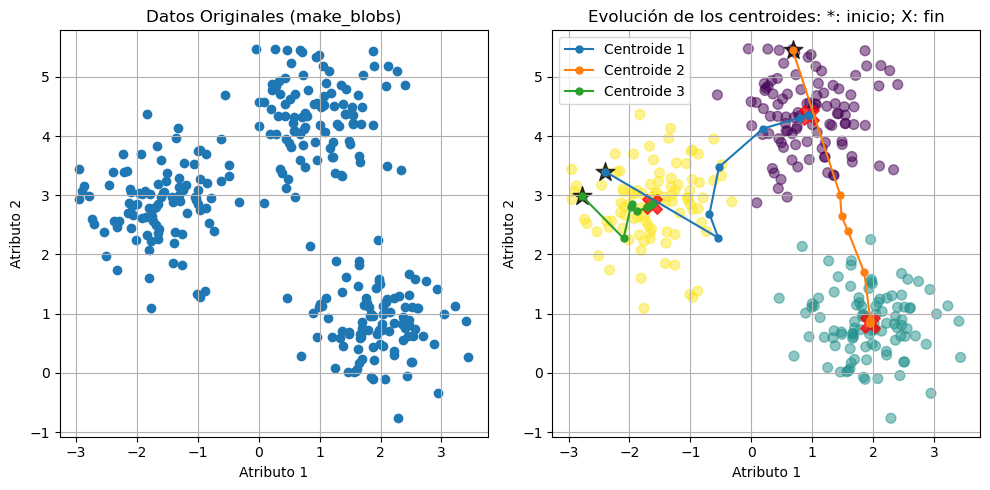

In [3]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X_Data, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
#X_Data, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)


# Re-run K-Means with the modified function to get all_centers
k = 3
centroides, etiquetas, all_centroides = Mi_kmedias(X_Data, k)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_Data[:, 0], X_Data[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_blobs)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the data points and centroid evolution
axes[1].scatter(X_Data[:, 0], X_Data[:, 1], c=etiquetas, s=50, cmap='viridis', alpha=0.5)

# Plot the movement of centers
# We transpose all_centers to easily access x and y coordinates for each center across iterations
all_centroides = np.array(all_centroides)

for i in range(k):
    axes[1].plot(all_centroides[:, i, 0], all_centroides[:, i, 1], marker='o', linestyle='-', markersize=5, label=f'Centroide {i+1}')
    # Centroide Inicial '*' negro
    axes[1].scatter(all_centroides[0, i, 0], all_centroides[0, i, 1], c='black', s=200, alpha=0.75, marker='*')

    # Mark the final center position with a larger 'X'
    axes[1].scatter(centroides[i, 0], centroides[i, 1], c='red', s=200, alpha=0.75, marker='X')


axes[1].set_title("Evolución de los centroides: *: inicio; X: fin")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Visualización de datos de tipo make_moons

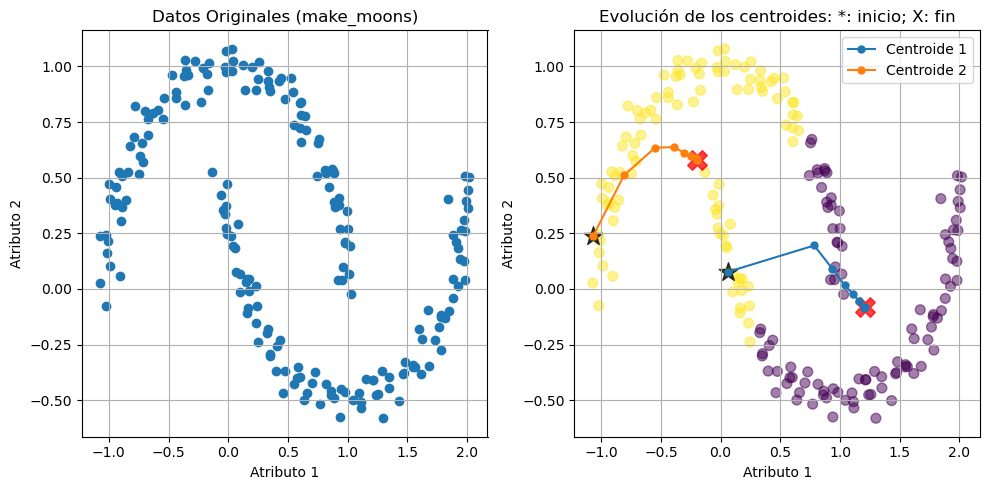

In [4]:
# Generate synthetic data
#X_Data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X_Data, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)


# Re-run K-Means with the modified function to get all_centers
k = 2
centroides, etiquetas, all_centroides = Mi_kmedias(X_Data, k)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_Data[:, 0], X_Data[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_moons)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the data points
axes[1].scatter(X_Data[:, 0], X_Data[:, 1], c=etiquetas, s=50, cmap='viridis', alpha=0.5)

# Plot the movement of centers
# We transpose all_centers to easily access x and y coordinates for each center across iterations
all_centroides = np.array(all_centroides)

for i in range(k):
    axes[1].plot(all_centroides[:, i, 0], all_centroides[:, i, 1], marker='o', linestyle='-', markersize=5, label=f'Centroide {i+1}')
    # Centroide Inicial '*' negro
    axes[1].scatter(all_centroides[0, i, 0], all_centroides[0, i, 1], c='black', s=200, alpha=0.75, marker='*')

    # Mark the final center position with a larger 'X'
    axes[1].scatter(centroides[i, 0], centroides[i, 1], c='red', s=200, alpha=0.75, marker='X')


axes[1].set_title("Evolución de los centroides: *: inicio; X: fin")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

K-medias con la bibliteca de "sklearn"

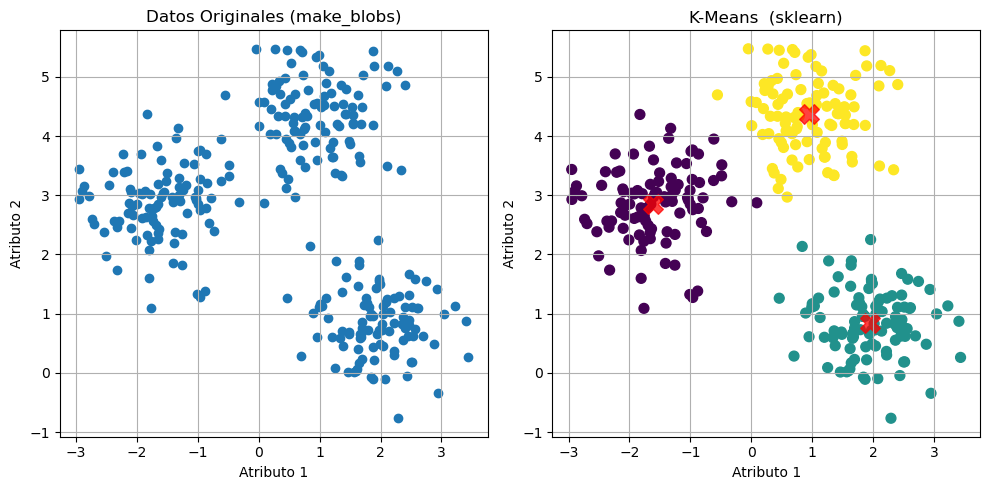

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

# Datos artificiales
X_blobs, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Usamos kmeans de sklearn
kmeans_blobs = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_blobs.fit(X_blobs)
y_kmeans_blobs = kmeans_blobs.predict(X_blobs)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_blobs)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Grafica del clustering
axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans_blobs, s=50, cmap='viridis')
centers_blobs = kmeans_blobs.cluster_centers_
axes[1].scatter(centers_blobs[:, 0], centers_blobs[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[1].set_title("K-Means  (sklearn)")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

c:\Users\Lab\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


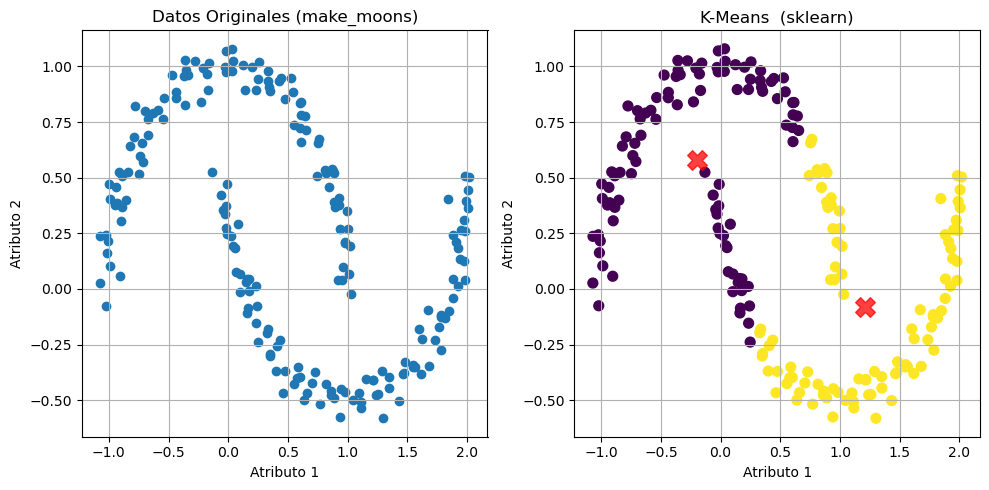

In [6]:
# Generate synthetic data
X_moons, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_moons.fit(X_moons)
y_kmeans_moons = kmeans_moons.predict(X_moons)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
axes[0].scatter(X_moons[:, 0], X_moons[:, 1]) #, c=y_true, s=50, cmap='viridis', alpha=0.5)
axes[0].set_title("Datos Originales (make_moons)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")
axes[0].grid(True)


# Visualize the results
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, s=50, cmap='viridis')
centers_moons = kmeans_moons.cluster_centers_
axes[1].scatter(centers_moons[:, 0], centers_moons[:, 1], c='red', s=200, alpha=0.75, marker='X')
axes[1].set_title("K-Means  (sklearn)")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

ejemplo con Laguna de Terminos

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd


In [8]:
# URL of the raw CSV data on GitHub
github_url = 'https://raw.githubusercontent.com/gilbertoCM/terminos_lagoon_carbonate/terminos_lagoon_carbonate_system_2024/data/terminoslagoon_TA_DIC_2024_RawData.csv'

# Load the data into a pandas DataFrame
try:
    df_laguna = pd.read_csv(github_url)
    print("Data loaded successfully from GitHub!")
    display(df_laguna.head())
except Exception as e:
    print(f"An error occurred while loading data from GitHub: {e}")

Data loaded successfully from GitHub!


,Sample,Date,Estuary,Area,Station,Layer_depth,Season,Chlorophy_microg_L,Cond_microsiemens_cm,Depth_m,DO_percent_sat,DO_mg_L,Sal_psu,Sp_cond_microsiemens_cm,Turbidity_fnu,Temp_C,latitude,longitude,DIC_micromol_kg,TA_micromol_kg
0,CDL01F,9/2/2021,Candelaria,River,CDL01,Bottom,Dry,3.80,1422.8,1.902,95.1,7.70,0.70,1399.3,259.85,25.878,18.55912,-91.25026,4324,4307
1,CDL02F,9/2/2021,Candelaria,River,CDL02,Bottom,Dry,2.82,1708.4,3.057,95.9,7.65,0.83,1654.4,10.73,26.709,18.60990,-91.24606,4295,4286
2,CDL02S,9/2/2021,Candelaria,River,CDL02,Surface,Dry,1.97,1724.6,0.116,105.4,8.25,0.82,1639.8,4.37,27.708,18.60990,-91.24600,4283,4265
3,CDL01S,9/2/2021,Candelaria,River,CDL01,Surface,Dry,2.74,1456.9,0.180,101.0,8.03,0.70,1405.8,6.86,26.911,18.55908,-91.25029,4278,4295
4,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,93.9,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863


In [9]:
display( df_laguna.columns)

Index(['Sample', 'Date', 'Estuary', 'Area', 'Station', 'Layer_depth', 'Season',
       'Chlorophy_microg_L', 'Cond_microsiemens_cm', 'Depth_m',
       'DO_percent_sat', 'DO_mg_L', 'Sal_psu', 'Sp_cond_microsiemens_cm',
       'Turbidity_fnu', 'Temp_C', 'latitude', 'longitude', 'DIC_micromol_kg',
       'TA_micromol_kg'],
      dtype='object')

Datos originales: 



array([[3.8000e+00, 1.4228e+03, 1.9020e+00, 9.5100e+01, 7.7000e+00,
        7.0000e-01, 1.3993e+03, 2.5985e+02, 2.5878e+01],
       [2.8200e+00, 1.7084e+03, 3.0570e+00, 9.5900e+01, 7.6500e+00,
        8.3000e-01, 1.6544e+03, 1.0730e+01, 2.6709e+01],
       [1.9700e+00, 1.7246e+03, 1.1600e-01, 1.0540e+02, 8.2500e+00,
        8.2000e-01, 1.6398e+03, 4.3700e+00, 2.7708e+01],
       [2.7400e+00, 1.4569e+03, 1.8000e-01, 1.0100e+02, 8.0300e+00,
        7.0000e-01, 1.4058e+03, 6.8600e+00, 2.6911e+01],
       [3.6000e-01, 7.0154e+03, 4.6400e-01, 9.3900e+01, 7.1200e+00,
        3.5600e+00, 6.5477e+03, 1.4700e+00, 2.8740e+01]])


 Datos escalados: 



array([[2.28510695e-02, 2.34932005e-02, 2.12587247e-01, 5.41763341e-01,
        6.56845754e-01, 1.80505415e-02, 2.38521087e-02, 1.06921822e-01,
        2.92541035e-01],
       [1.63411718e-02, 2.82552005e-02, 3.49225127e-01, 5.46403712e-01,
        6.52512998e-01, 2.14027849e-02, 2.82434719e-02, 4.06680291e-03,
        4.65198421e-01],
       [1.06948319e-02, 2.85253140e-02, 1.30131314e-03, 6.01508121e-01,
        7.04506066e-01, 2.11449201e-02, 2.79921434e-02, 1.44092814e-03,
        6.72761272e-01],
       [1.58097516e-02, 2.40617726e-02, 8.87258961e-03, 5.75986079e-01,
        6.85441941e-01, 1.80505415e-02, 2.39640015e-02, 2.46898289e-03,
        5.07168086e-01],
       [0.00000000e+00, 1.16742365e-01, 4.24701289e-02, 5.34802784e-01,
        6.06585789e-01, 9.17998969e-02, 1.12478116e-01, 2.43595302e-04,
        8.87180553e-01]])

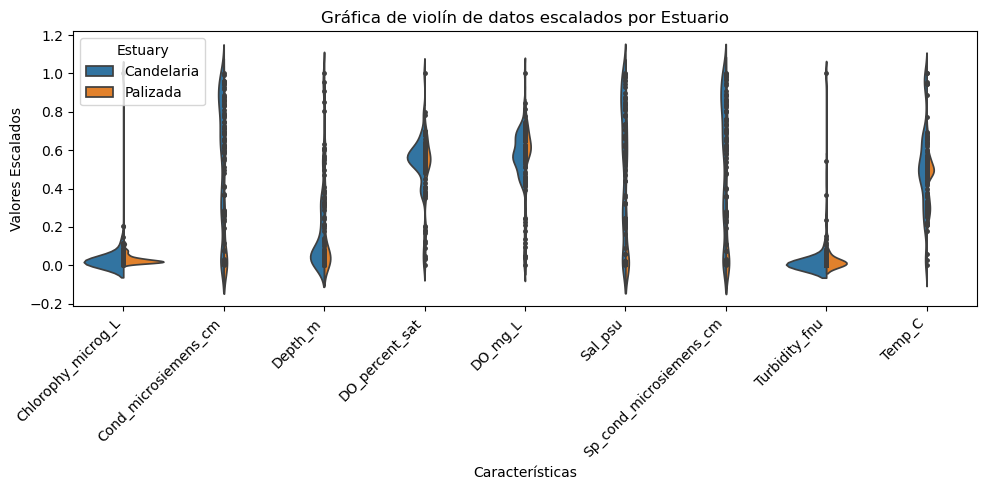

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

# Select the desired numerical columns for scaling
numerical_cols = ['Chlorophy_microg_L', 'Cond_microsiemens_cm', 'Depth_m',
       'DO_percent_sat', 'DO_mg_L', 'Sal_psu', 'Sp_cond_microsiemens_cm',
       'Turbidity_fnu', 'Temp_C',]
X_laguna = df_laguna[numerical_cols].values

# Scale the data
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X_laguna)

print('Datos originales: \n')
display(X_laguna[:5])
print('\n Datos escalados: \n')
display(X_Scaled[:5])

# Create a DataFrame with scaled numerical features and the 'Estuary' column
df_X_Laguna = pd.DataFrame(X_Scaled, columns=numerical_cols)
df_X_Laguna['Estuary'] = df_laguna['Estuary'].values

# Melt the DataFrame to a long format for violin plotting by feature and estuary
df_melted = df_X_Laguna.melt(id_vars='Estuary', value_vars=numerical_cols, var_name='Feature', value_name='Scaled Value')

# Create a violin plot for each feature, colored by estuary
plt.figure(figsize=(10, 5)) # Adjusted figure size
sns.violinplot(data=df_melted, x='Feature', y='Scaled Value', hue='Estuary', split=True, inner="point", bw_method='scott',  bw_adjust=0.5)
plt.title("Gráfica de violín de datos escalados por Estuario")
plt.xlabel('Características')
plt.ylabel('Valores Escalados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
     

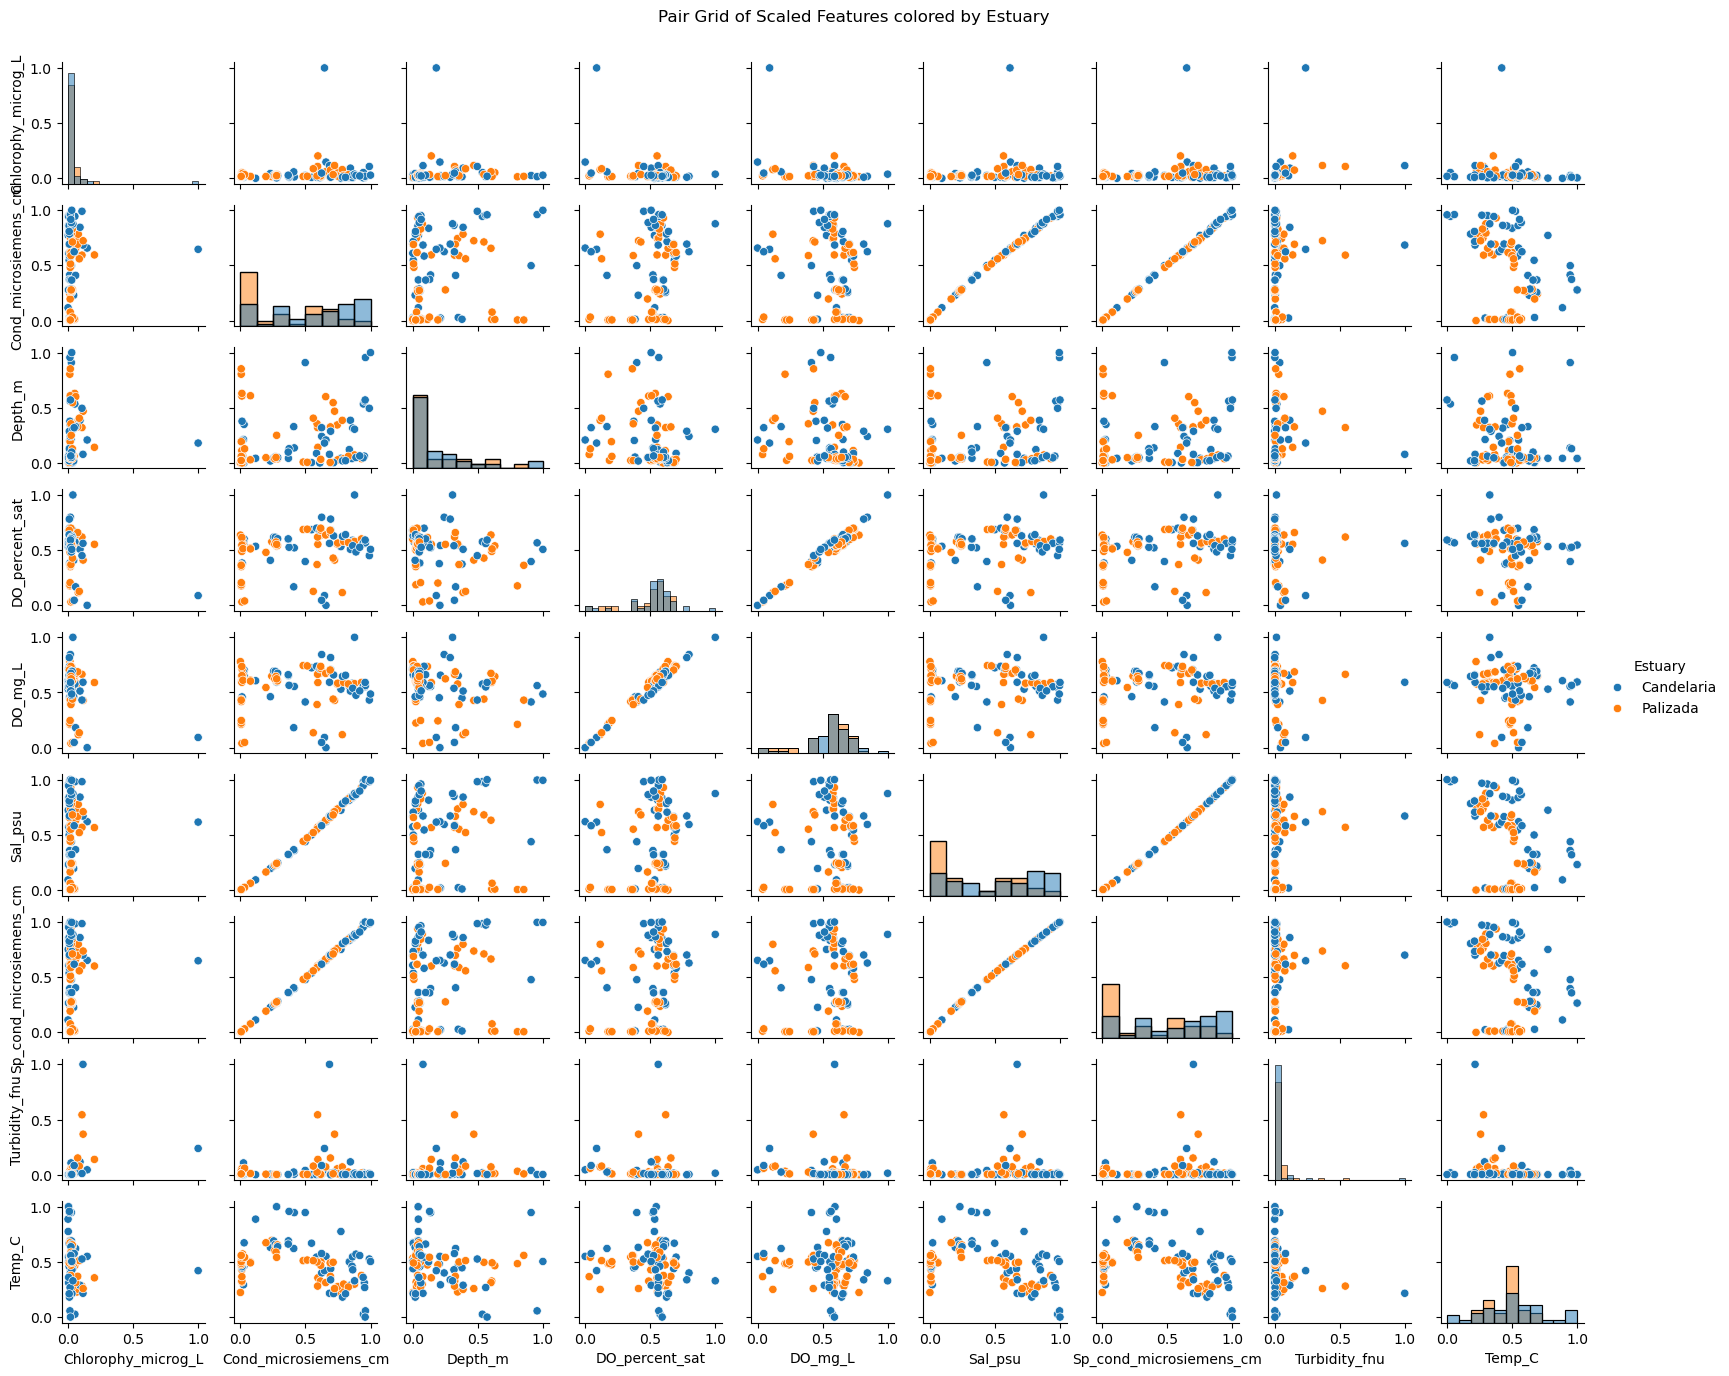

In [11]:
column_names = ['Chlorophy_microg_L', 'Cond_microsiemens_cm', 'Depth_m',
       'DO_percent_sat', 'DO_mg_L', 'Sal_psu', 'Sp_cond_microsiemens_cm',
       'Turbidity_fnu', 'Temp_C',]
# Extract the 'Estuary' column from the original DataFrame
estuary_data = df_laguna['Estuary']

# Create a new DataFrame with scaled numerical features and the 'Estuary' column
# Ensure the index is aligned if necessary, but assuming they are from the same source
df_X_Laguna = pd.DataFrame(X_Scaled, columns=column_names)
df_X_Laguna['Estuary'] = estuary_data.values # Add the estuary data as a new column


g = sns.PairGrid(df_X_Laguna, hue="Estuary", height=1.5, aspect=1.2) # Adjusted height and aspect
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.suptitle("Pair Grid of Scaled Features colored by Estuary", y=1.02) # Add a title
g.add_legend() # Add a legend for the hue
plt.show()
     


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # Import KMeans

# Create a new DataFrame with the specified features
df_clustering = df_laguna[["Cond_microsiemens_cm", "Temp_C"]].copy()

# Add the 'Estuary' column to this new DataFrame for plotting later
df_clustering['Estuary'] = df_laguna['Estuary'].values

# Extract the data for clustering
X_clustering = df_clustering[["Cond_microsiemens_cm", "Temp_C"]].values


# Perform K-Means clustering with k...
k = 4
kmeans_laguna_new = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans_laguna_new.fit(X_clustering)
y_kmeans_laguna_new = kmeans_laguna_new.predict(X_clustering)

# Add the new cluster labels to the DataFrame
df_clustering['Cluster'] = y_kmeans_laguna_new


print(f"K-Means , k = {k}, 'Cond_microsiemens_cm' Vs 'Temp_C'.")
display(df_clustering.head())

K-Means , k = 4, 'Cond_microsiemens_cm' Vs 'Temp_C'.


c:\Users\Lab\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Cond_microsiemens_cm,Temp_C,Estuary,Cluster
0,1422.8,25.878,Candelaria,2
1,1708.4,26.709,Candelaria,2
2,1724.6,27.708,Candelaria,2
3,1456.9,26.911,Candelaria,2
4,7015.4,28.740,Candelaria,2


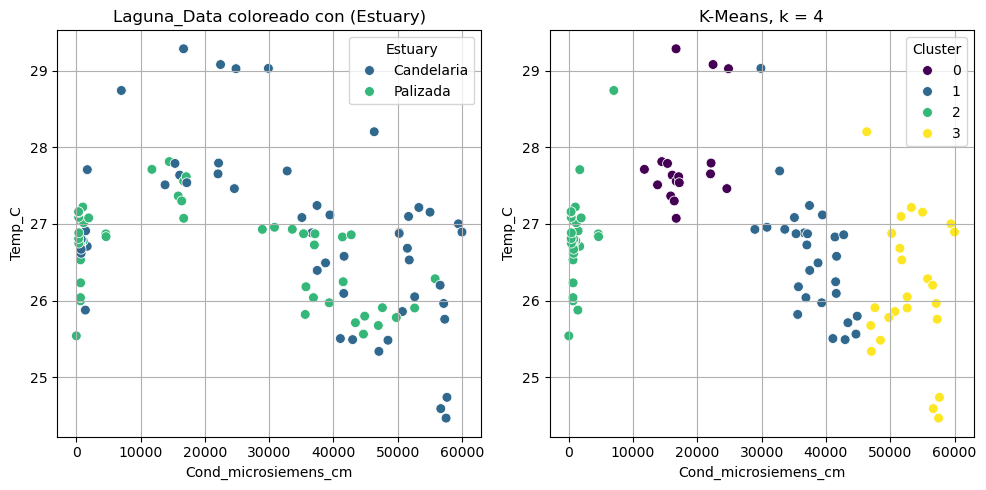

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

# Plot 1: Colored by Estuary
sns.scatterplot(data=df_clustering, x="Cond_microsiemens_cm", y="Temp_C",
                hue="Estuary", palette="viridis", s=50, ax=axes[0])
axes[0].set_title("Laguna_Data coloreado con (Estuary)")
axes[0].set_xlabel("Cond_microsiemens_cm")
axes[0].set_ylabel("Temp_C")
axes[0].grid(True)

# Plot 2: Colored by K-Means Cluster
sns.scatterplot(data=df_clustering, x="Cond_microsiemens_cm", y="Temp_C",
                hue="Cluster", palette="viridis", s=50, ax=axes[1])
axes[1].set_title(f"K-Means, k = {k}")
axes[1].set_xlabel("Cond_microsiemens_cm")
axes[1].set_ylabel("Temp_C")
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()